<a href="https://colab.research.google.com/github/pribonif/DIO-Analise-de-dados-python-pandas/blob/main/DIO_Python4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalhando com planilhas do excel#

In [ ]:
# Importando a biblioteca
import pandas as pd

In [ ]:
# Leitura dos arquivos
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')


In [ ]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [ ]:
# concatenando, juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
# Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
# Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
# Pra pegar uma amostra do conjunto de dados
df.sample(5) # de 5 linhas diversas

,Cidade,Data,Vendas,LojaID,Qtde
228,Natal,2019-01-02,6.87,1037,3
30,Aracaju,2018-01-01,119.21,1520,8
123,Salvador,2019-03-02,127.45,1036,3
19,Fortaleza,2019-01-01,18.86,1002,3
36,Aracaju,2018-01-01,37.99,1523,8


In [ ]:
# Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
# Alterando o tipo de dado da coluna LojaID, passar de int pra object, pq n vamos realizar cálculo
df['LojaID'] = df['LojaID'].astype('object')


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


##Tratando valores faltantes##

In [ ]:
# Consultando linhas com valores faltantes, valores nulos
df.isnull().sum() # se for nulo, traga a soma

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Substituindo os valores nulos pela media
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True) # o implace substitui na memoria

In [ ]:
df['Vendas'].mean() # a media de vendas que sera colocada onde tem valor null, devido ao codigo acima

122.61180089485458

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
98,Aracaju,2018-01-01,138.33,1521,10
8,Recife,2019-02-11,56.47,980,6
83,Fortaleza,2019-01-01,3.88,1002,6
84,Salvador,2019-01-01,22.99,1036,1
108,Salvador,2019-03-02,11.72,1037,1
38,Natal,2018-02-25,828.00,852,4
75,Natal,2019-03-30,706.00,854,2
80,Salvador,2019-01-01,40.24,1036,2
21,Aracaju,2018-01-01,37.36,1520,2
56,Recife,2019-01-01,7.98,983,5


In [ ]:
# Substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [ ]:
# Apagando linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
# Apagando as linhas com valores nulos com base apenas em 1 coluna,
# no exemplo, apagar apenas na coluna de vendas
df.dropna(subset=['Vendas'], inplace=True) 


In [ ]:
# Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

##Criando colunas novas##

In [ ]:
# Criando a coluna de receita (vendas * qtde)
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
# Criando a coluna Receita/Vendas pra saber a Qtde, caso nao tivesse (receita /vendas = qtde)
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
# Retornando a maior receita
df['Receita'].max()

3544.0

In [ ]:
# Retornando a menor receita
df['Receita'].min()

3.34

In [ ]:
# nlargest, pra saber as linhas com maiores receitas
# retorna as 3 linhas com maiores receitas
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
# nsmallest, pra saber as linhas com menores receitas
# retorna as 3 linhas com piores receitas
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
# Agrupamento por cidade, retorna a soma da receita por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Ordenando o conjunto de dados, no caso pela receita
df.sort_values('Receita', ascending=False).head(10) # ascending=False pra retornar do maior para o menor

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


##Trabalhando com datas##

In [ ]:
# Transformando a coluna de data em tipo inteiro
df['Data'] = df['Data'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
# Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
# Transformando a coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
# Agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum() # vai na data e extrai apenas o ano, e traz a soma da receita por ano

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
# Criando uma nova coluna com o ano, Ano_Venda
df['Ano_Venda'] = df['Data'].dt.year # extrai o ano da Data

In [ ]:
df.sample(5) # pega uma amostra de 5 linhas

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
106,Natal,2019-01-02,149.19,1035,2,298.38,2.0,2019
111,Salvador,2019-03-02,147.35,1037,2,294.70,2.0,2019
221,Salvador,2019-01-02,142.23,1035,2,284.46,2.0,2019
71,Natal,2019-03-20,840.00,854,3,2520.00,3.0,2019
51,Recife,2019-01-01,146.95,982,2,293.90,2.0,2019


In [ ]:
# Extraindo o mês e o dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [ ]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1


In [ ]:
# Retornando a data mais antida
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Calculando a diferença de dias
df['Diferenca_dias'] = df['Data'] - df['Data'].min()

In [ ]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_dias
203,Natal,2019-01-02,37.75,1035,2,75.5,2.0,2019,1,2,366 days


In [ ]:
# Criando a coluna de trimestre
df['Trimestre_Venda'] = df['Data'].dt.quarter

In [ ]:
df.sample(3)  

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_dias,Trimestre_Venda
138,Recife,2019-03-02,150.38,983,6,902.28,6.0,2019,3,2,425 days,1
202,Natal,2019-01-02,22.45,1036,1,22.45,1.0,2019,1,2,366 days,1
114,Natal,2019-01-02,25.52,1034,1,25.52,1.0,2019,1,2,366 days,1


In [ ]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_dias,Trimestre_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1,0 days,1


In [ ]:
# se for excluir 
# df = df.drop(columns='Semestre_venda')

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_dias,Trimestre_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1,0 days,1


##Visualização de dados##

In [ ]:
# pega o total de vendas por Loja_ID (ex. Loja_ID: 1036; Vendas: 117)
df['LojaID'].value_counts(ascending=False) # ascending = False, pra retornar do maior para o menor

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

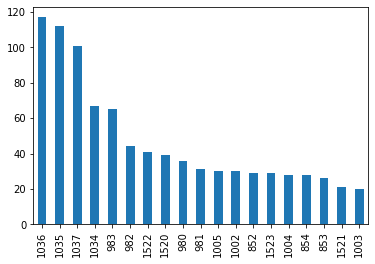

In [ ]:
# Grafico de barras 
df['LojaID'].value_counts(ascending=False).plot.bar()

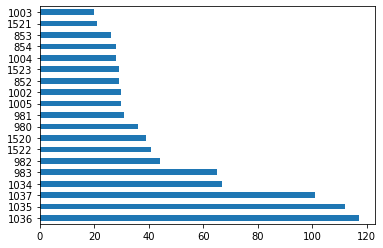

In [ ]:
# Grafico de barras horizontais
df['LojaID'].value_counts().plot.barh()

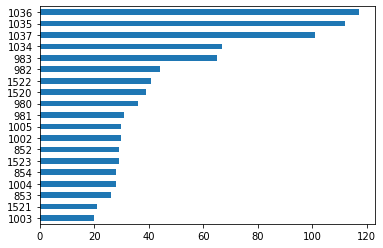

In [ ]:
# Grafico de barras horizontais
df['LojaID'].value_counts(ascending=True).plot.barh(); # o ; pra nao sair o texto acima do grafico

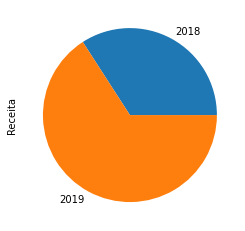

In [ ]:
# Grafico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [ ]:
# Total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

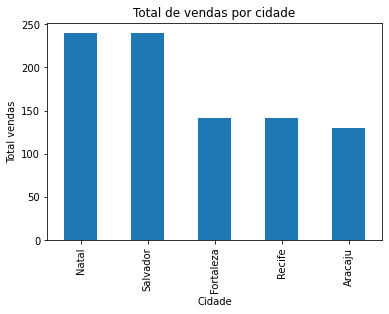

In [ ]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

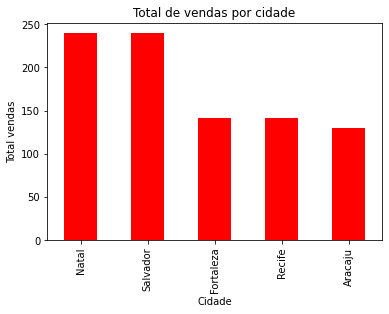

In [ ]:
# Alterando a cor das barras
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

In [ ]:
# Alterando o estilo
plt.style.use('ggplot')

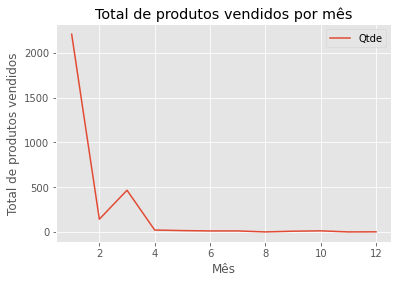

In [ ]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = 'Total de produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend();

In [ ]:
# Agrupando, pra saber o total de vendas por mês
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

In [ ]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

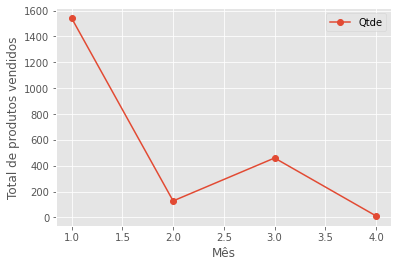

In [ ]:
# Total de produtos vendidos por mes em 2019
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o') # marker = marcador
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend();

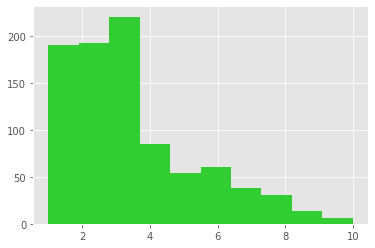

In [ ]:
# Histograma
plt.hist(df['Qtde'], color='limegreen');

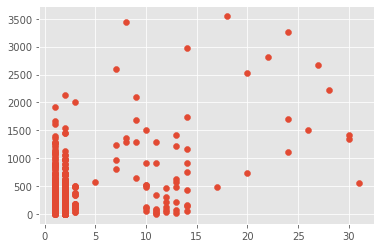

In [ ]:
# Gráfico de dispersão
plt.scatter(x = df_2019['dia_venda'], y = df_2019['Receita']);

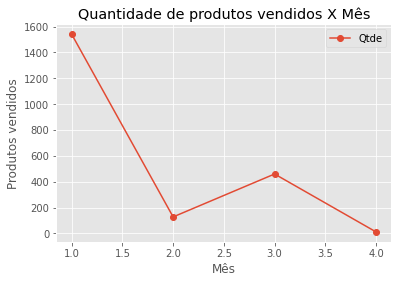

In [ ]:
# Salvar em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.title('Quantidade de produtos vendidos X Mês')
plt.xlabel('Mês')
plt.ylabel('Produtos vendidos')
plt.legend()
plt.savefig('Grafico Qtde X Mês.png')